<a href="https://colab.research.google.com/github/mc-08/ML-EXAM-_1/blob/main/TEST_2_22_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data=pd.read_csv('/content/drive/MyDrive/ML_EXAM/Decision Tree + Random Forest + Ensemble Techniques/admission.csv')

In [9]:
data=data.drop(['Serial No.'],axis=1)

In [10]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

***Q.1 Perform Exploratory Data Analysis (EDA) tasks ***

a) Visualize the 10 random rows of the data set

In [12]:
data.sample(n=10 , replace = True)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
457,295,99,1,2.0,1.5,7.57,0,0.37
312,311,107,4,4.5,4.5,9.00,1,0.78
244,314,107,2,2.5,4.0,8.56,0,0.63
258,326,102,4,5.0,5.0,8.76,1,0.77
347,299,94,1,1.0,1.0,7.34,0,0.42
227,312,110,2,3.5,3.0,8.53,0,0.64
261,312,104,3,3.5,4.0,8.09,0,0.71
197,310,106,2,3.5,2.5,8.33,0,0.73
195,307,107,2,3.0,3.5,8.52,1,0.78
429,340,115,5,5.0,4.5,9.06,1,0.95


b) Generate the description for numeric variables

In [13]:
 data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


c) Check the shape of the data set

In [14]:
data.shape

(500, 8)

d) Generate the correlation matrix

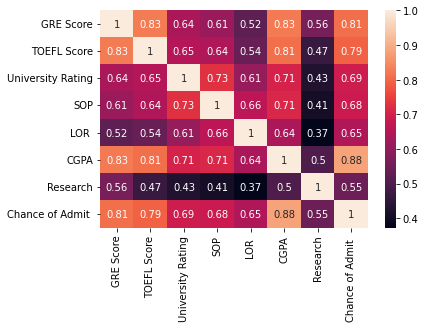

In [15]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

e) Generate a correlogram

In [16]:
import numpy as np
c = np.corrcoef(data)
print(c)

[[1.         0.99980902 0.99980461 ... 0.99991571 0.99979794 0.99998615]
 [0.99980902 1.         0.99999425 ... 0.9994833  0.99999153 0.99987695]
 [0.99980461 0.99999425 1.         ... 0.99947324 0.9999755  0.99986453]
 ...
 [0.99991571 0.9994833  0.99947324 ... 1.         0.99947763 0.99985407]
 [0.99979794 0.99999153 0.9999755  ... 0.99947763 1.         0.99987838]
 [0.99998615 0.99987695 0.99986453 ... 0.99985407 0.99987838 1.        ]]


***Q.2	Find out the minimum and maximum values for GRE score***

In [17]:
q=data['GRE Score'].values


In [18]:
print('Maximum of GRE Score is: ',data['GRE Score'].max())

Maximum of GRE Score is:  340


In [19]:
print('Minimum of GRE Score is: ',data['GRE Score'].min())

Minimum of GRE Score is:  290


***Q.3	Find out the percentage of universities for each university rating***

In [20]:
data['perc']=data['University Rating']/data['University Rating'].sum()*100

In [21]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,perc
0,337,118,4,4.5,4.5,9.65,1,0.92,0.256904
1,324,107,4,4.0,4.5,8.87,1,0.76,0.256904
2,316,104,3,3.0,3.5,8.00,1,0.72,0.192678
3,322,110,3,3.5,2.5,8.67,1,0.80,0.192678
4,314,103,2,2.0,3.0,8.21,0,0.65,0.128452
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,0.321130
496,337,117,5,5.0,5.0,9.87,1,0.96,0.321130
497,330,120,5,4.5,5.0,9.56,1,0.93,0.321130
498,312,103,4,4.0,5.0,8.43,0,0.73,0.256904


***Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :***

Students having the “Chance of Admit” value > 0.80, are assigned value 1,
and       
Students having the “Chance of Admit” value < 0.80, are assigned value 0     
Where 0: Low chance of Admission and 1: High chance of admission

In [22]:
r=data['Chance of Admit '].values

In [23]:
for i in range(0,len(r)):
  if(r[i]>0.80):
    r[i]=1
  elif(r[i]<=0.80):
    r[i]=0

In [24]:
r

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,perc
0,337,118,4,4.5,4.5,9.65,1,1.0,0.256904
1,324,107,4,4.0,4.5,8.87,1,0.0,0.256904
2,316,104,3,3.0,3.5,8.00,1,0.0,0.192678
3,322,110,3,3.5,2.5,8.67,1,0.0,0.192678
4,314,103,2,2.0,3.0,8.21,0,0.0,0.128452
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1.0,0.321130
496,337,117,5,5.0,5.0,9.87,1,1.0,0.321130
497,330,120,5,4.5,5.0,9.56,1,1.0,0.321130
498,312,103,4,4.0,5.0,8.43,0,0.0,0.256904


***Q.5	Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.***

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
 8   perc               500 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 35.3 KB


In [27]:
x=data.drop(['Chance of Admit '],axis=1).values
y=data['Chance of Admit '].values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.tree import DecisionTreeClassifier
u=DecisionTreeClassifier()

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=0)

In [31]:
u.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [32]:
i=u.predict(xtest)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
f=accuracy_score(ytest,i)
print(f)

0.96


In [35]:
confusion_matrix(ytest,i)

array([[92,  3],
       [ 2, 28]])

In [36]:
o=classification_report(ytest,i)
print(o)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        95
         1.0       0.90      0.93      0.92        30

    accuracy                           0.96       125
   macro avg       0.94      0.95      0.95       125
weighted avg       0.96      0.96      0.96       125



In [37]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [38]:
pca=decomposition.PCA()
sc=StandardScaler()

In [39]:
dt=tree.DecisionTreeClassifier()


In [40]:
pipe=Pipeline(steps=[('sc',sc),('pca',pca),('dt',dt)])

In [41]:
n_components=list(range(1,x.shape[1]+1,1))

In [42]:
criterion=['gini','entropy']
max_depth=[1,2,3,4,5]

In [43]:
p=dict(pca__n_components=n_components,dt__criterion=criterion,dt__max_depth=max_depth)

In [44]:
clf=GridSearchCV(pipe,p)

In [45]:
clf.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [1, 2, 3, 4, 5],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8]})

In [46]:
print('Best max_depth: ',clf.best_estimator_.get_params()['dt__max_depth'])


Best max_depth:  1


In [47]:
print('Best Criterion: ',clf.best_estimator_.get_params()['dt__criterion'])

Best Criterion:  gini


In [48]:
print(clf.best_estimator_.get_params()['dt'])

DecisionTreeClassifier(max_depth=1)


In [49]:
CV_result=cross_val_score(clf,x,y,cv=4, n_jobs=-1)

In [50]:
print(CV_result)
print(CV_result.mean())
print(CV_result.std())


[0.944 0.896 0.896 0.92 ]
0.9139999999999999
0.019899748742132375


***Q.6	Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.***

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [52]:
m=RandomForestClassifier()


In [53]:
m.fit(xtrain,ytrain)

RandomForestClassifier()

In [54]:
pp=m.predict(xtest)

In [55]:
print(pp)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0.]


In [56]:
m.predict_proba(xtest)

array([[1.  , 0.  ],
       [0.22, 0.78],
       [0.84, 0.16],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.81, 0.19],
       [0.04, 0.96],
       [0.99, 0.01],
       [0.43, 0.57],
       [1.  , 0.  ],
       [0.76, 0.24],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.11, 0.89],
       [0.98, 0.02],
       [0.82, 0.18],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.19, 0.81],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.17, 0.83],
       [0.11, 0.89],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.97, 0.03],
       [0.93, 0.07],
       [0.65, 0.35],
       [0.  , 1.  ],
       [0.4 ,

In [57]:
accuracy_score(ytest,pp)

0.976

In [58]:
confusion_matrix(ytest,pp)

array([[93,  2],
       [ 1, 29]])

In [59]:
z=classification_report(ytest,pp)
print(z)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        95
         1.0       0.94      0.97      0.95        30

    accuracy                           0.98       125
   macro avg       0.96      0.97      0.97       125
weighted avg       0.98      0.98      0.98       125



In [60]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [61]:
y_proba=m.predict_proba(xtest)
y_predicted=y_proba[:,1]

In [62]:
print(y_predicted)

[0.   0.78 0.16 0.9  0.   0.   0.   0.02 0.   0.06 0.01 0.01 0.   0.19
 0.96 0.01 0.57 0.   0.24 0.   0.   0.07 0.   1.   0.89 0.02 0.18 0.
 0.   0.   0.   0.   0.   0.81 0.   0.02 0.83 0.89 0.   0.   0.01 1.
 0.95 0.03 0.07 0.35 1.   0.6  0.02 0.   0.   0.   0.   0.24 0.01 0.94
 0.   0.87 0.   0.   0.   1.   0.   0.96 0.09 0.   0.05 0.89 0.   0.36
 0.99 0.25 0.03 0.06 0.35 1.   0.19 0.02 0.   0.01 0.   0.99 0.   0.
 0.08 0.   0.36 0.   0.   0.06 0.   0.23 0.   0.03 0.   0.98 0.   0.02
 0.   0.   0.83 0.1  1.   0.01 0.02 0.03 0.13 0.87 0.03 0.04 0.   0.
 0.   0.   0.02 0.86 0.   1.   0.82 0.99 0.04 0.24 1.   0.8  0.03]


In [63]:
fpr,tpr,thresholds=roc_curve(ytest,y_predicted)

In [64]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9917543859649123


In [65]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'True Positive Rate(sensitivity')

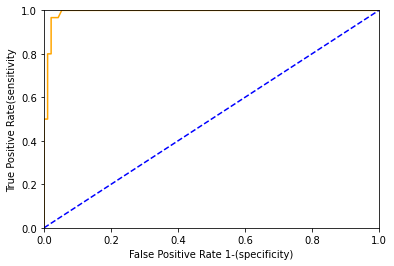

In [66]:
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate 1-(specificity)')
plt.ylabel('True Positive Rate(sensitivity')

***Q.7	Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university***

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

log_classifier =  LogisticRegression()
sv_classifier = SVC()
sgd_classifier = SGDClassifier()


def classifiers(clf1, clf2, clf3, x_train,y_train):
    clfs = [clf1, clf2, clf3]
    all_clfs_acc = []
    for clf in clfs:
        clf.fit(xtrain, ytrain)
        preds = clf.predict(xtrain)
        acc = accuracy_score(ytrain,preds)
        acc = acc.tolist()
        all_clfs_acc.append(acc)
    return all_clfs_acc

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
classifiers(log_classifier,sv_classifier, sgd_classifier, xtrain, ytrain)

[0.8906666666666667, 0.7013333333333334, 0.7573333333333333]

In [70]:
from sklearn.ensemble import VotingClassifier

vot_classifier = VotingClassifier(
    
    estimators=[('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)], 
    voting='hard')

vot_classifier.fit(xtrain, ytrain)

VotingClassifier(estimators=[('log_reg', LogisticRegression()), ('svc', SVC()),
                             ('sgd', SGDClassifier())])

***Q.8	Compare all of the models and justify your choice about the optimum model***

{'boxes': [<matplotlib.lines.Line2D at 0x7f5a20067890>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5a2006c910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a20072950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5a20072410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5a20067e50>,
  <matplotlib.lines.Line2D at 0x7f5a2006c3d0>]}

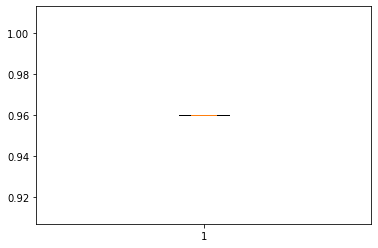

In [71]:
# accuracy of decision tree model
# increased acccuracy of Random Forest Model
plt.boxplot(f,roc_auc)

By Above analysis we come to a conclusion that Random Forest Model has the highest accuracy score with 99.2% 